<a href="https://colab.research.google.com/github/k-dinakaran/Cloudcredits/blob/main/predicting_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📊 Dataset Overview
Shape: (506, 14)

Columns and Data Types:
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

🔎 Missing Values:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

📈 Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25

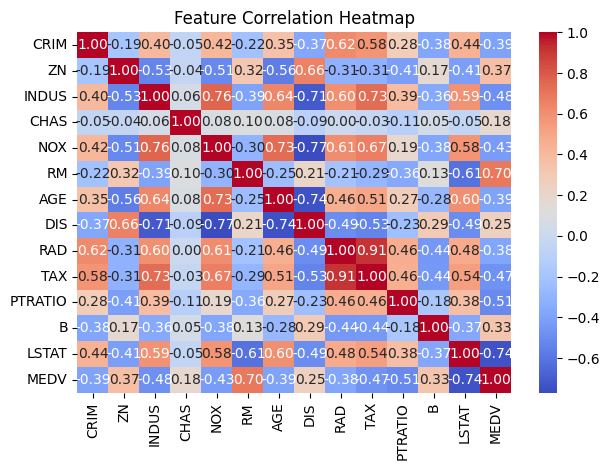


✅ Model Evaluation:
Mean Squared Error (MSE): 31.45
R² Score: 0.63

--- Enter House Features to Predict Price ---
CRIM: 0.03
ZN: 25.0
INDUS: 5.0
CHAS: 0.0
NOX: 0.45
RM: 6.8
AGE: 30.0
DIS: 5.0
RAD: 4
TAX: 300
PTRATIO: 16.0
B: 395.0
LSTAT: 6.5

🏠 Predicted House Price: $31.33 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "HousingData.csv"
df = pd.read_csv(file_path)

# data exploration
print("\n📊 Dataset Overview")
print(f"Shape: {df.shape}")
print("\nColumns and Data Types:")
print(df.dtypes)

print("\n🔎 Missing Values:")
print(df.isnull().sum())

print("\n📈 Summary Statistics:")
print(df.describe())

# Optional: visualize correlations
try:
    sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Heatmap plot skipped (error or headless environment):", e)

# =======================
# 🧼 Data Cleaning
# =======================

# Drop rows with missing values
df_clean = df.dropna()

# Define features and target
X = df_clean.drop("MEDV", axis=1)
y = df_clean["MEDV"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =======================
# 🤖 Model Training
# =======================

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n✅ Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# =======================
# 🧪 User Input for Prediction
# =======================

print("\n--- Enter House Features to Predict Price ---")
input_data = {}
for col in X.columns:
    value = float(input(f"{col}: "))
    input_data[col] = value

# Convert to DataFrame and predict
user_df = pd.DataFrame([input_data])
predicted_price = model.predict(user_df)[0]

print(f"\n🏠 Predicted House Price: ${predicted_price:.2f} ")
